In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [2]:
dataset_train = pd.read_csv('trainset.csv')

In [3]:
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
train_set = dataset_train.iloc[:,1:2].values

In [6]:
type(train_set)

numpy.ndarray

In [7]:
train_set.shape

(1259, 1)

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [9]:
training_set_scaled.shape

(1259, 1)

In [10]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [11]:
X_train.shape

(1199, 60)

In [12]:
length = 60
n_features = 1

In [13]:
model = Sequential([layers.SimpleRNN(50,input_shape=(60,1)),
                    layers.Dense(1)])

In [14]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.fit(X_train1,y_train,epochs=20, batch_size=32)

Epoch 1/20
38/38 [==============================] - 7s 42ms/step - loss: 0.0552
Epoch 2/20
38/38 [==============================] - 2s 48ms/step - loss: 0.0018
Epoch 3/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0011
Epoch 4/20
38/38 [==============================] - 1s 36ms/step - loss: 9.5523e-04
Epoch 5/20
38/38 [==============================] - 1s 36ms/step - loss: 8.2347e-04
Epoch 6/20
38/38 [==============================] - 1s 35ms/step - loss: 7.6624e-04
Epoch 7/20
38/38 [==============================] - 1s 35ms/step - loss: 7.7808e-04
Epoch 8/20
38/38 [==============================] - 1s 34ms/step - loss: 6.6654e-04
Epoch 9/20
38/38 [==============================] - 1s 35ms/step - loss: 7.1033e-04
Epoch 10/20
38/38 [==============================] - 2s 53ms/step - loss: 6.3698e-04
Epoch 11/20
38/38 [==============================] - 1s 36ms/step - loss: 6.2452e-04
Epoch 12/20
38/38 [==============================] - 1s 35ms/step - loss: 5.8550e-04
E

In [16]:
dataset_test = pd.read_csv('testset.csv')

In [17]:
test_set = dataset_test.iloc[:,1:2].values

In [18]:
test_set.shape

(125, 1)

In [19]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [20]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)

In [21]:
X_test = []
y_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
  y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [22]:
X_test.shape

(1324, 60, 1)

In [23]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 [==============================] - 0s 6ms/step


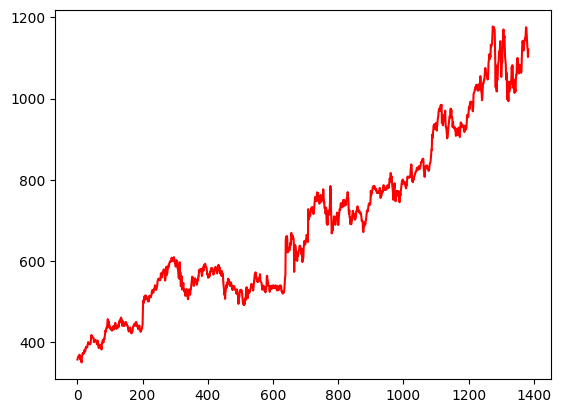

In [24]:
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')

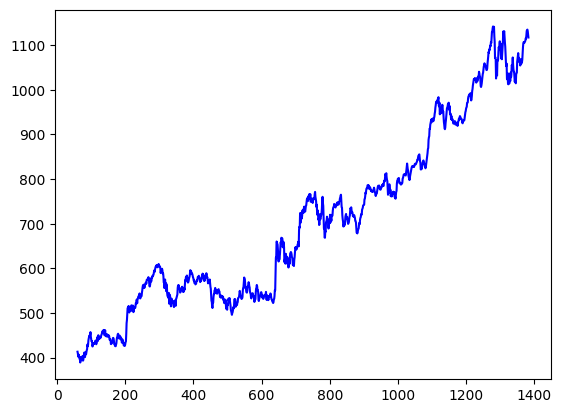

In [25]:
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue',
		label = 'Predicted Google stock price')

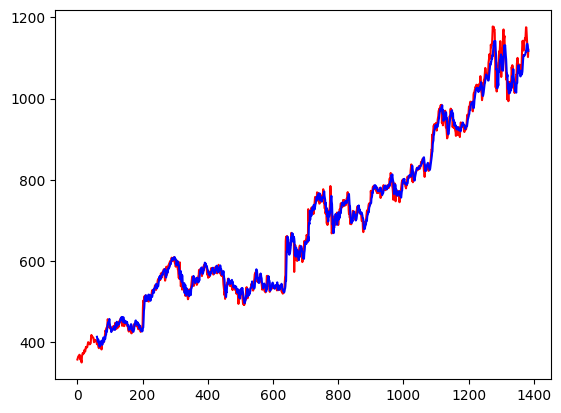

In [26]:
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue',
		label = 'Predicted Google stock price')


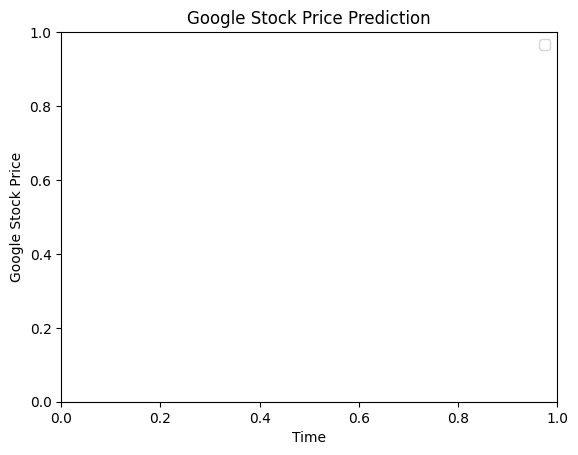

In [27]:
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test,predicted_stock_price)

536303.0744901615